In [47]:
! pip install scipy

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [49]:
# Parameters
epochs = 10
batch_size = 128
num_classes = 10    
input_shape  = (28 , 28 , 1)

In [50]:
# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [51]:
# Reshape (add channel dimension)
x_train = x_train.reshape((60000, 28, 28, 1))
x_test  = x_test.reshape((10000, 28, 28, 1))

In [52]:
# Normalize
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

In [53]:
# One-hot encode labels
y_train = to_categorical(y_train, num_classes)
y_test  = to_categorical(y_test, num_classes)

In [54]:
# Build CNN model

model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))  

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


In [55]:
# Compile
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [56]:
datagen = ImageDataGenerator(
    rotation_range=15,      
    width_shift_range=0.1,  
    height_shift_range=0.1,
    zoom_range=0.1,        
    shear_range=0.1,       
)



In [57]:
# Train
datagen.fit(x_train)
model.fit(datagen.flow(x_train, y_train, batch_size=128),
          validation_data=(x_test, y_test),
          epochs=epochs)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - accuracy: 0.6403 - loss: 1.0700 - val_accuracy: 0.9784 - val_loss: 0.0690
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.9081 - loss: 0.2970 - val_accuracy: 0.9852 - val_loss: 0.0417
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.9326 - loss: 0.2168 - val_accuracy: 0.9874 - val_loss: 0.0367
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.9436 - loss: 0.1878 - val_accuracy: 0.9893 - val_loss: 0.0286
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - accuracy: 0.9509 - loss: 0.1640 - val_accuracy: 0.9910 - val_loss: 0.0272
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.9556 - loss: 0.1524 - val_accuracy: 0.9914 - val_loss: 0.0233
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - accuracy: 0.9600 - loss: 0.1309 - val_accuracy: 0.9917 - val_loss: 0.0214
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 0.9616 - loss: 0.1283 - 

In [58]:
# Evaluate
accuracy = model.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy : ", accuracy[1])

Test Accuracy :  0.9927999973297119


In [59]:
def predict_sample(index):
    res = model.predict(x_test[index].reshape(1,28,28,1))
    predicted_label = np.argmax(res)
    true_label = np.argmax(y_test[index])
    
    plt.imshow(x_test[index].reshape(28,28), cmap='gray')
    plt.title(f"Predicted: {predicted_label}, True: {true_label}")
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


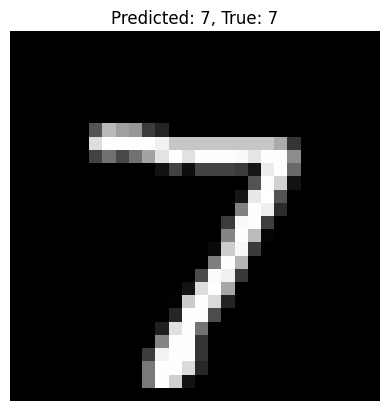

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


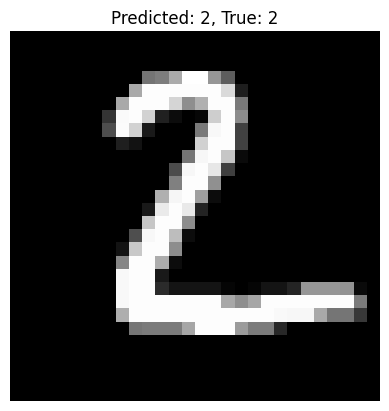

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


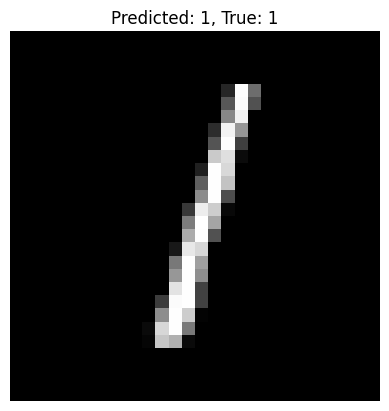

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


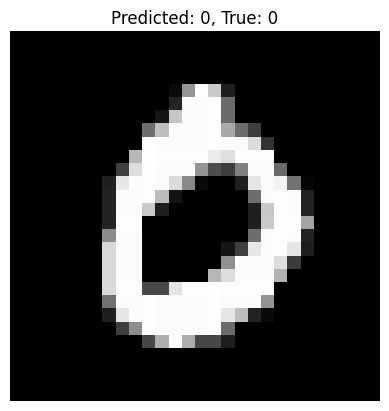

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


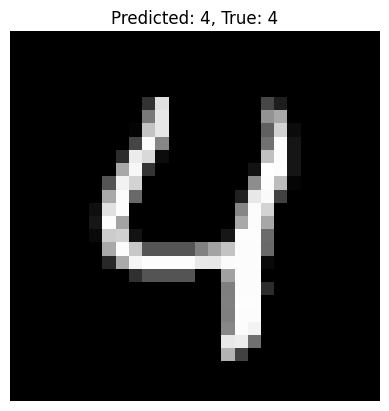

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


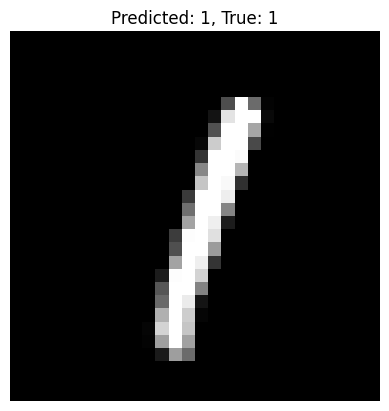

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


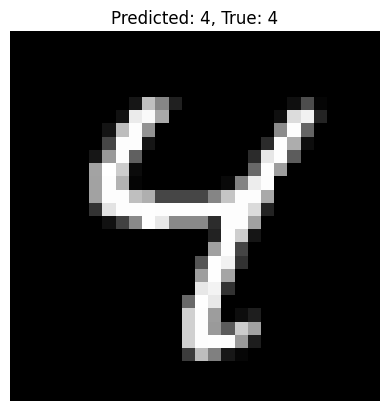

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


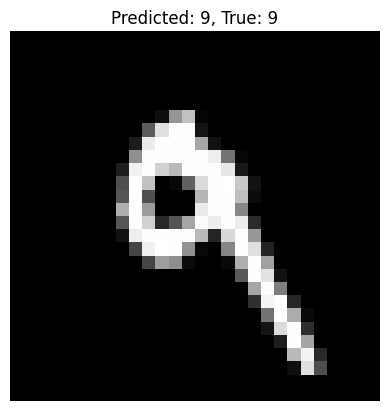

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


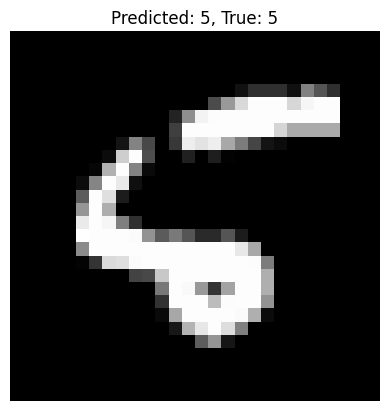

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


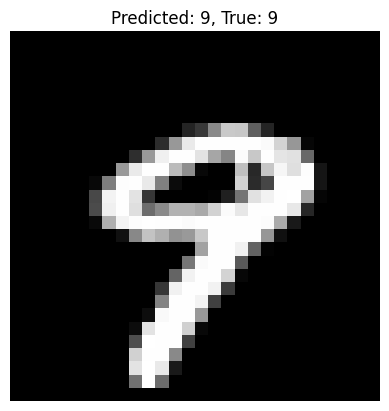

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


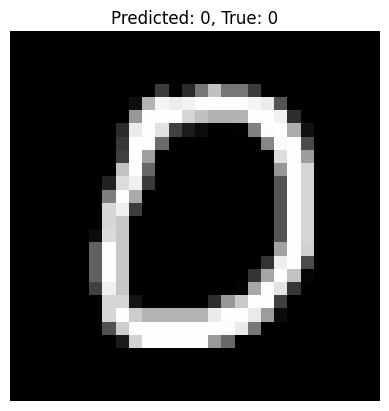

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


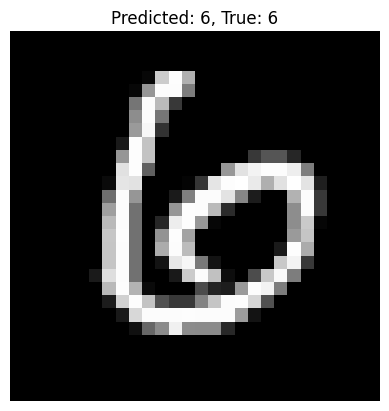

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


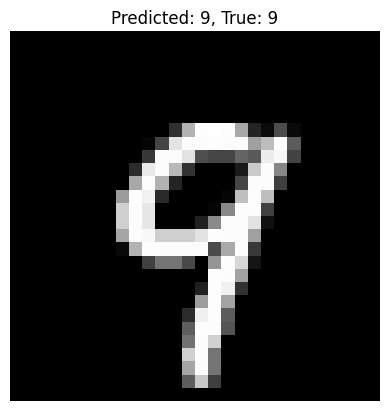

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


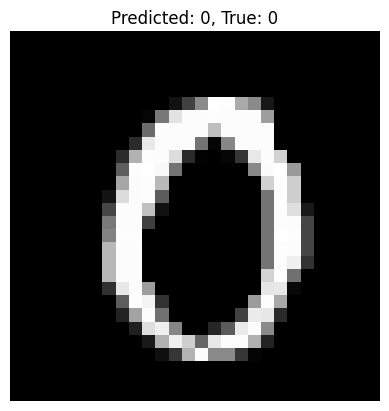

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


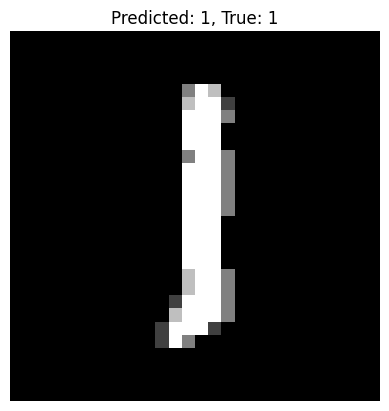

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


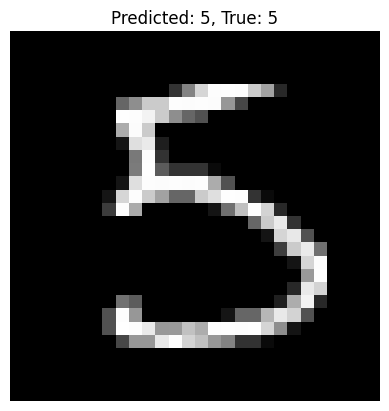

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


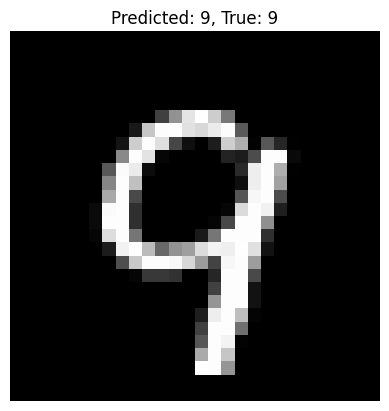

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


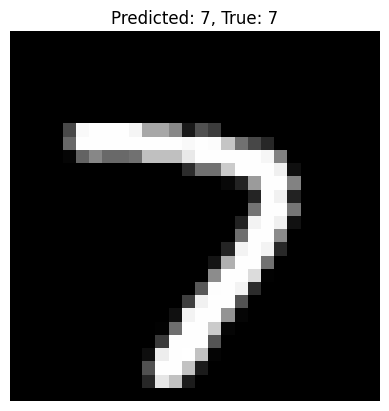

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


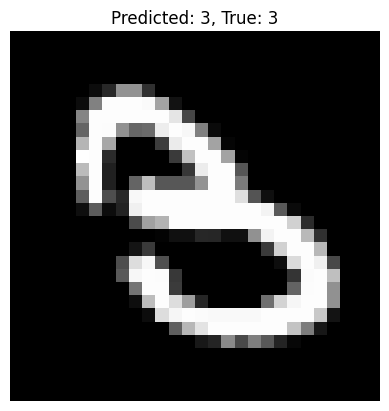

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


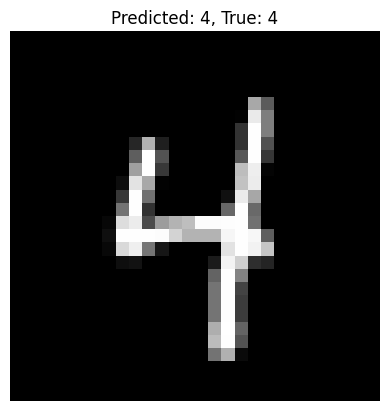

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


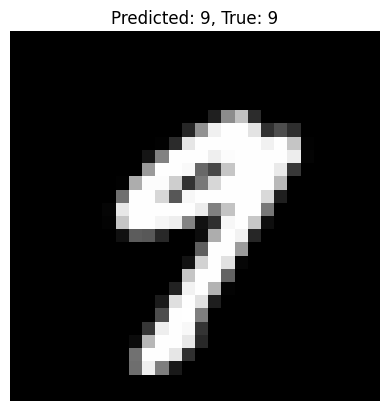

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


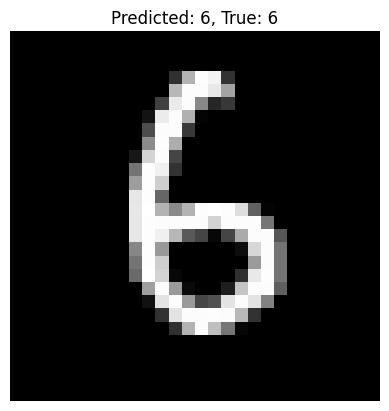

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


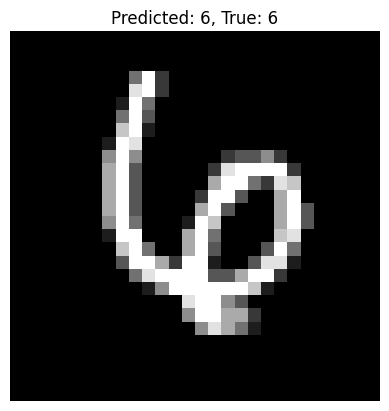

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


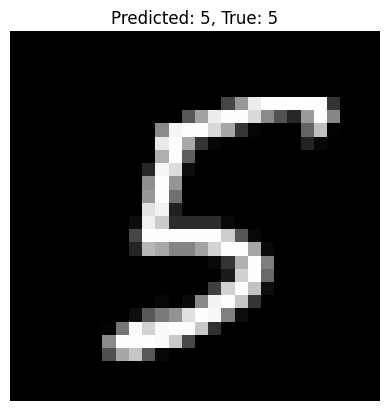

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


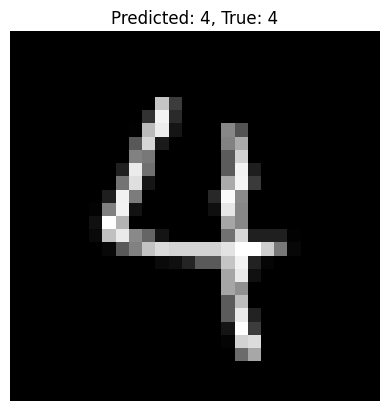

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


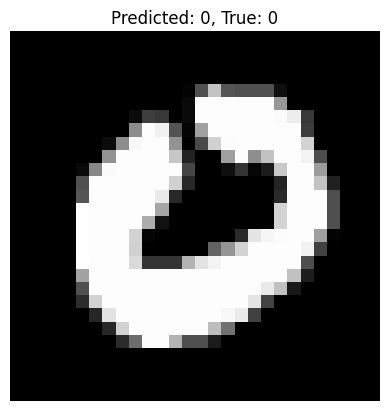

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


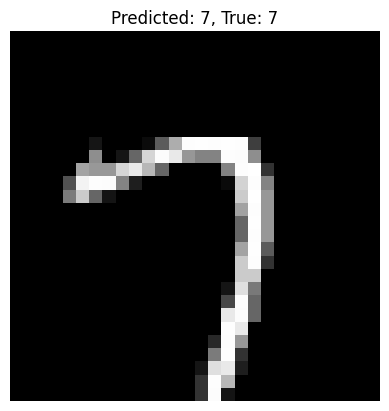

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


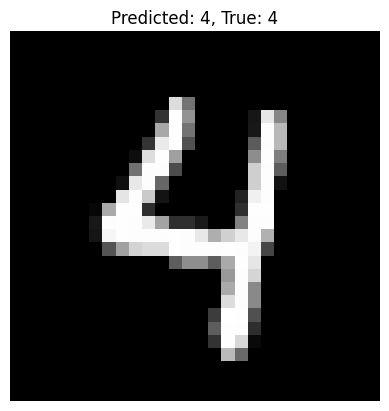

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


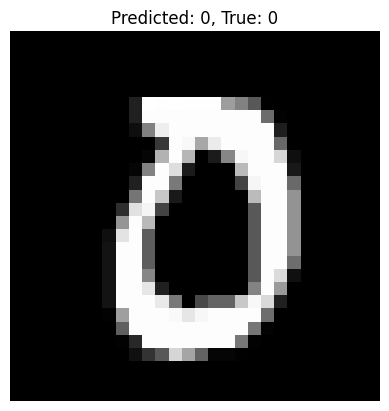

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


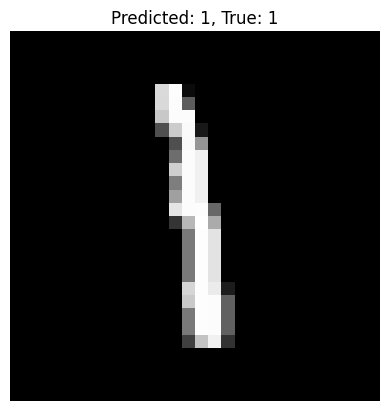

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


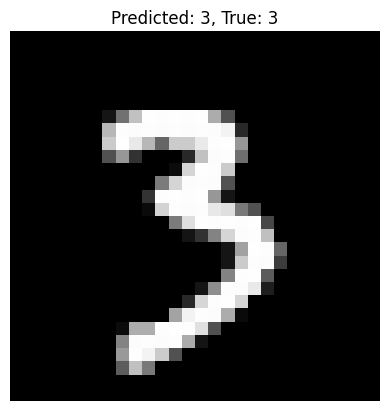

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


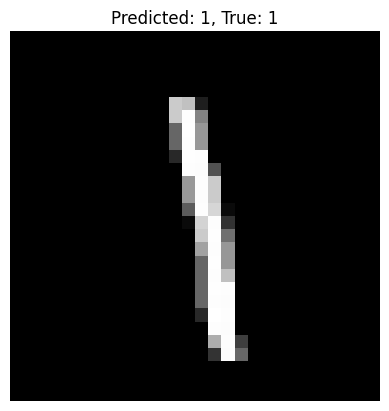

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


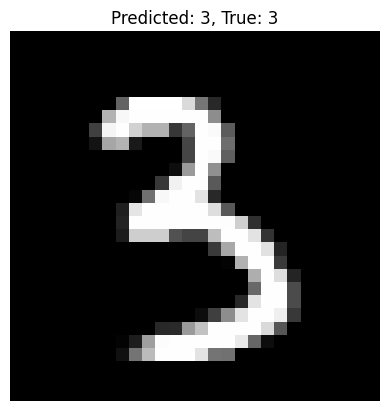

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


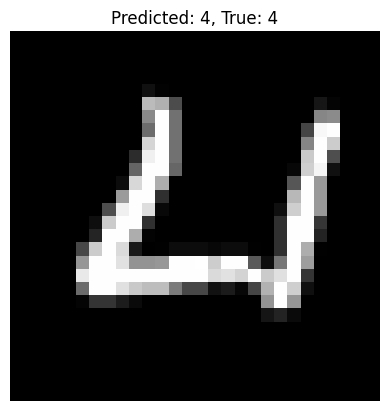

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


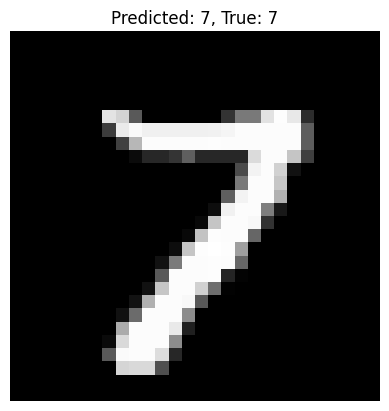

In [60]:
for i in range(35):
    predict_sample(i)

In [ ]:
model.save('digit_recognition_model.h5')